**2020/21**

# Classification
This lecture is about data classification in discrete spaces.

Previously we have worked on linear regression, where the goal was to establish predictions in a continuous space. Now we keep the same sort of goal but moving into the discrete space.

In this notebook, the dataset under consideration is from the domain of financial markets. We still be using the Apache Spark MLlib, as well as will be revisiting the concept of `ML Pipeline`.

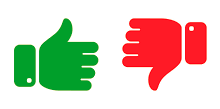

# ML Pipelines

As stated in the Spark's programming guide, *"ML Pipelines provide a uniform set of high-level APIs built on top of DataFrames that help users create and tune practical machine learning pipelines."*

Hence, it is possible to combine multiple algorithms into a single pipeline, or workflow. 

Besides DataFrames, it involves the following:

1. **Transformer**: an algorithm which can transform one DataFrame into another DataFrame. For example, an ML model is a Transformer which transforms a DataFrame with features into a DataFrame with predictions.

2. **Estimator**: an algorithm which can be fit on a DataFrame to produce a Transformer. For example, a learning algorithm is an Estimator which trains on a DataFrame and produces a model.

3. **Pipeline**: the way to chain multiple Transformers and Estimators together to specify an ML workflow.

4. **Parameter**: all Transformers and Estimators share a common API for specifying parameters.


Further details can be found in http://spark.apache.org/docs/latest/ml-pipeline.html

In [ ]:
# some imports 

import os # OS e.g directory structure
import numpy as np # linear algebra
import scipy as sc  # scientific computing
import pandas as pd # data processing, file I/O
import seaborn as sns  # visualization
import matplotlib.pyplot as plt # visualization
import warnings
warnings.filterwarnings("ignore")

# Exercise

This exercise is about **stock market prediction** in the financial industry. Our case-study and dataset is based on a Kaggle competition currently going on, which details can be found in https://www.kaggle.com/c/jane-street-market-prediction .

Obviously we are not going to create a complex quantitative trading system but just work on a tiny bit - classification. It relates to deciding whether a particular trade proposal is going to be accepted, so traded, or not. 

Basically, the functional requirements for the Spark program we are about to create are as follows:


1. To load the dataset under analysis and making sure it can be further processed by a ML classifier. 
2. To create a classification model supported by a SVM algorithm, fitted for the purpose of the classification goal set above.
3. For each day, to compute the daily score as the sum of the product `weight` x `resp` (see schema below) of the trades the system opt to trade in that day. In that respect, the data to be processed is different from the one being used to create the model.
    

## Context
`Buy low, sell high.` Sounds good but it is not as easy as it seems!

Financial markets are nowdays very complex. In such a fast-moving environment, electronic trading allows for thousands of transactions to occur within a fraction of a second, and so providing many opportunities to find and take advantage of price differences in real time.

In an efficient market, buyers and sellers would have all the information they need to make rational decisions. As result, products remain at *fair* values, not undervalued nor overpriced. But in the real world, markets do not work like that. 

Developing trading strategies to identify and take advantage of inefficiencies is challenging. Even if a strategy is profitable at some point in time, it may not be in the future, and market volatility makes it impossible to predict the profitability of any given trade with certainty. It is hard to distinguish good luck from good trading decision. 

The ultimated goal is to build a quantitative trading model to maximize returns using real time market data. Once the model faces trading opportunities, it must decide whether to accept or reject them.

The all building process includes testing its predictiveness against future market returns, as well as checking against historical data, the so-called backtesting. There are a few more notes worth considering, namely:

- The development of good models is very challenging. For example, we may collect too much noise from the market data, there will be redundancy in the information collected, we may experience strong feature correlations, it is difficult to establish a proper mathematical formulation, etc.
- An highly predictive model, which selects the right trades to execute, will contribute to pushing prices closer to *fair* values, as it sends correct messages to the market.
- As more people are using this kind of strategies, the slimest advantage due to having good models will pay off. 


## Market data

The dataset we are going to use relates to the Kaggle competition mentioned above. It contains an anonymized set of features, feature_{0...129}, representing real stock market data features. For example, trading volume and volatility in various time horizons, statistical indicators like Relative Strength Index (RSI), etc.

Each row in the dataset represents a trading opportunity, for which the system will be predicting an action value: 1 to make the trade or 0 to pass on it. 

For each trade, there is an associated `weight` and `resp`. The former, `weight`, is the importance of the trade like for example a ratio of transaction cost or, in other words, the capital invested in the trade.

The `resp` represents the return of the trade, and we can have additional returns over specific but not revealed time horizons. But what really matters is `resp`.

The data also includes the day of the trade (as a number) and a value `ts_id` representing time ordering. 


**Column Description**


|Column     | Type       | Description |
|--------  |---------  |--------- |
| **date** | Integer | Day of the trade |
| **weight** | Double |The importante of the trade. When 0, it does not contribute for the score of the evaluation of the model, but it is included for the purpose of completeness  |
| **resp_1** | Double | Value related to returns over time horizon 1 |
| **resp_2** | Double | Value related to returns over time horizon 2 |
| **resp_3** | Double | Value related to returns over time horizon 3 |
| **resp_4** | Double | Value related to returns over time horizon 4 |
| **resp** | Double | Value i.e. returns|
| **feature_0** | Double | Value of anonymized feature 0|
| ... | ... | Columns with features 1 to 128, |
| **feature_129** | Double | Value of anonymized feature 129 |
| **ts_id** | Integer | Time ordering |

    

## Useful functions
Some functions we may use

In [ ]:
def ScatterPlot(df, width, height):
    plt.figure(figsize=(width, height))
    plt.pcolor(df)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.show()

## Loading the dataset

In [ ]:
! pwd 
! ls -la
# ! head -n 3 JaneStreetMarket.csv
# ! tail -n 3 JaneStreetMarket.csv

In [ ]:
# some Spark related imports

import sys

from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
# read the dataset JaneStreetMarket.csv
# this time we will be using pyspark.sql.DataFrameReader.csv

df = 

## Exploratory data analysis

Let us get some insight from data

In [ ]:
# check the data, both schema and some content

df.printSchema()
cols = df.columns
df.count()

In [ ]:
df.show(2)


### Data cleasing/preparation

In [ ]:
# checking nulls
# It seems there are no nulls anyway



In [ ]:
# columns

cols_non_features = 

cols_features =

cols_interesting = 

In [ ]:
cols_non_features

In [ ]:
cols_features

In [ ]:
# wondering if we can reduce the size of the DataFrame, 
# just for the purpose of working locally with a small dataset

max_rows = 20000 # out of 2 390 491

# limit the number of rows 

dfclean = 

In [ ]:
# As for completing missing numeric values, we can use Inputer 
# either using the mean or the median of the columns in which the missing 
# values are located. 

# See pyspark.ml.feature.Imputer

# leave it for now

In [ ]:
del df

### Basic statistics
Correlations and summary statistics about the data


In [ ]:
# use of Correlation from pyspark.ml.stat

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Correlation requires vectors so prior we convert to vector column

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=cols_interesting, outputCol=vector_col)
df_vector = assembler.transform(dfclean).select(vector_col)

# get correlation matrix

matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
# corrmatrix

In [ ]:
# Python DataFrame for visualization

df_plot = 
# df_plot

In [ ]:
# plot and draw conclusions about similarities among features
# check around [1..40], [61..70], [71..120], [121...129]

ScatterPlot(df_plot, 20, 20)

In [ ]:
# summary of basic statistics with describe()



In [ ]:
# and check average values by day (it seems sensible as, on average, 
# daily behaviour does not change that much)

dfclean_daily = 


In [ ]:
dfclean_daily.printSchema()

In [ ]:
df_plot = dfclean_daily.toPandas()
df_plot

In [ ]:
df_plot.plot(x ='date', y=['avg(weight)'], kind = 'line')
df_plot.plot(x ='date', y=['avg(resp)', 'avg(resp_1)', 'avg(resp_2)', 'avg(resp_3)', 'avg(resp_4)'], kind = 'line')

plt.show()

In [ ]:
# What about some clustering of features?
# We leave it for the time being


In [ ]:
# clear some objects we no longer need

del

From now on, dfclean is what matters

## Classification
Given the clean dataset, we start to train and test a model that will be used for classification, that is, to decide whether to trade or not. 

We are going to use a Linear Support Vector Machine algorithm, as presented in http://spark.apache.org/docs/latest/ml-classification-regression.html#linear-support-vector-machine . The picture below highlights the concept supporting the algorithm.

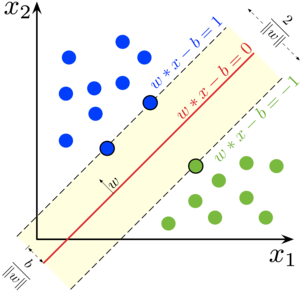

In [ ]:
# some pyspark imports

from pyspark.ml import Pipeline
from pyspark.ml.classification import LinearSVC

### Feature and target engineering
It is time to decide which columns to use, whether to remove columns or add new derived ones, etc.
To do so, we should understand what the business is all about, alongside the characteristics of the data we were given. Previous basic statistics made, and more to do,  would help to figure out patterns of interest. (recall that features are anonymized) Clustering is also an option. 

In the context of this course, we will make straightforward decisions so leaving a thoroughly business analysis for the experts. But at the end of the day, there is a score to pursuit, as pointed out above:

*For each day, to compute the daily score as the sum of the product `weight` x `resp` (see schema below) of the trades the system opt to trade in that day. In that respect, the data to be processed is different from the one being used to create the model.*

**Notice**: MLlib provides a set of tools to help tackling this issue of features. (See http://spark.apache.org/docs/latest/ml-features.html) We leave it for another exercise.


In [ ]:
# columns we will hold: cols, features and targets

features = 
targets = 

# label, the target to predict, to be assumed as 
# positive if both weight and resp are positive
# when(df.age < 3, -1).otherwise(0)
df_preprocessed = 

# [features, targets]

In [ ]:

df_preprocessed.count()

### Training/testing data split

In [ ]:
dftrain, dftest = 

# caching data ... but just the train


# print the number of rows in each part


In [ ]:
# recalling the schema of training data

dftrain.printSchema()

In [ ]:
# feature engineering

# we have to put all input features into a single vector, 
# by using a transformer

vec_assembler = VectorAssembler(inputCols=features, outputCol="features")
vec_dftrain = vec_assembler.transform(dftrain)


## Model setting
Use of the Linear SVM algorithm to learn from the training dataset

In [ ]:
# the SVC algorithm 

# defaults: featuresCol='features', labelCol='label', predictionCol='prediction'
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# fit the model

lsvc_model = lsvc.fit(vec_dftrain)

# print the coefficients and intercept for the linear SVC

# Print the coefficients and intercept for linear SVC
print("Coefficients: " + str(lsvc_model.coefficients))
print("Intercept: " + str(lsvc_model.intercept))


### ML pipeline configuration

In [ ]:
# pipeline holding two stages: vec_assembler and lsvc_model
      
pipeline = Pipeline(stages=[vec_assembler, lsvc_model])

### Fitting the pipeline to training data

In [ ]:
# get the pipeline model (as transformer) 
# by fitting the pipline to training data

pipeline_model = pipeline.fit(vec_dftrain)

### Predictions on testing data

In [ ]:
# make predictions on testing data and show values of columns of interest

df_prediction = pipeline_model.transform(dftest)

# check its schema

df_prediction.printSchema()

# show columns of interest


### Model evaluation

How right is supposed to be the model? Let us figure out based on the **confusion matrix** below

<img src="confusion_matrix.png" width="350px"/>

Recalling:
* True Positive: the prediction was positive and it is true. (Great, we trade and score)
* True Negative: the prediction was negative and it is true. (Fine, we do not trade and so avoiding to lose)
* False Positive: the prediction was positive and it is false. (Terrible, we trade and lose)
* False Negative: the prediction was negative and it is false. (Not so good, we do not trade and therefore missing to score)

**TP, TN, FP and FN computations**

In [ ]:
# get dataframes just containing positive TP, TN, FP and FN respectively

df_tp = df_prediction.withColumn("TP", expr("prediction > 0") & expr("label == prediction")).filter("TP == true")
df_tn = 
df_fp = 
df_fn = 

# counting rows for each case 

tp = df_tp.count()
tn = df_tn.count()
fp = df_fp.count()
fn = df_fn.count()

# print out the counting
[tp, tn, fp, fn, df_prediction.count()]

In [ ]:
# just to check if we got it right

df_tp.show()
df_tn.show()
df_fp.show()
df_fn.show()


**Accuracy = (TP + TN) / (TP + TN + FP + FN)**

How often the classifier is correct

In [ ]:
accuracy = 

**Precision = TP / (TP + FP)** 

Positive predictive value

In [ ]:
precision = 

**Recall = TP / (TP + FN)**

True positive rate (hit rate)

In [ ]:
recall = 

**F-measure = 2 x Recall x Precision / (Recall + Precision)**

Useful metric because it is difficult to compare two models with low precision and high recall or vice versa. Indeed, it helps to measure Recall and Precision at the same time

In [ ]:
fmeasure = 

In [ ]:
# Confusion matrix outcome

print("TP = {}, TN = {}, FP = {}, FN = {}, Total = {}".format(tp, tn, fp, fn, tp+tn+fp+fn))
print("Accuracy = {}".format(accuracy))
print("Precison = {}".format(precision))
print("Recall = {}".format(recall))
print("F-measure = {}".format(fmeasure))

### Saving the model for further use if needed

In [ ]:
svm_path = "modelSVM"

# lsvc_model.save(svm_path)

# later one, we can load it via LinearSVC.load(svm_path)


In [ ]:
! ls -la ./modelSVM/metadata

## The daily score

Back to business

In [ ]:
# compute the daily score 
# based on the trades made in that day, as  weight x resp

df_score = 

gdf = 

df_daily_score = gdf.agg({"score": "sum"})

trading_days = 

acumulative_score = 

df_daily_score.show()

print("For the {} trading days, the accumulative score is {}".format(trading_days, 
                                                            acumulative_score))

In [ ]:
# just for checking 

# compute the daily score equally as weight x resp 
# but based on trades set by the initial label 

df_score_ini = )

gdf = 

df_daily_score_ini = 

trading_days_ini = 

acumulative_score_ini = 

df_daily_score_ini.show()

print("For the {} trading days, the accumulative score is {}".format(trading_days_ini, 
                                                            acumulative_score_ini))

**To think about**:

- How can we interpret the two scores above? 
    - check with the prediction DataFrame for the columns involved, as well as the confusion matrix
- Could a model with different feature and/or target engineering would do better?
- And when to be applied to real time data?
- And how to say label != prediction

# Additional exercise

Once the previous exercise has been completed, create a new notebook with similar implementations but using the following classifiers instead:
1. Logistic Regression
2. Decision Tree
    
Also, we suggest you to try improving the process of feature/target engineering. 

See related information in:

http://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression

http://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier



# References

* Learning Spark - Lightning-Fast Data Analytics, 2nd Ed. J. Damji, B. Wenig, T. Das, and D. Lee. O'Reilly, 2020
* Spark: The Definitive Guide - Big Data Processing Made Simple, 1st Ed. B. Chambers and M. Zaharia. O'Reilly, 2018
* http://spark.apache.org/docs/latest/ml-guide.html
* https://docs.python.org/3/
* https://www.kaggle.com/c/jane-street-market-prediction
